In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data Import

In [2]:
df = pd.read_csv('name_name.csv', dtype={"reps": np.int64, "comm" : str, "auth" : str})


In [3]:
df.head()

,reps,auth,comm
0,26,Maria Shaldibina,Stev Witzel
1,17,Eduardo Valentin,Daniel
2,24,Eric W. Biederman,geiti94
3,519,Paul Jakma,Paul Jakma
4,122,Laxman Dewangan,Stephen Warren


## Data Cleaning

In [4]:
df.isnull().values.sum()

345

In [5]:
nan_rows = df[df.isnull().any(1)]
nan_rows

,reps,auth,comm
2295,225,NaN,root
5867,24,NaN,mark
12673,18,NaN,舒志凌
13649,55,NaN,Jeff Garzik
18747,21,John Axel Eriksson,NaN
23358,21,Fish,NaN
25165,22,NaN,黄志伟
27935,477,NaN,git-darcs-import
29367,18,Lars van de Kerkhof,NaN
29690,27,NaN,Ease


In [6]:
df = df.dropna()
df.isnull().values.sum()

0

## Sample Graph

In [7]:
#dfn = df.sample(1000)
#del df

In [8]:
#G = nx.DiGraph(directed=True)
#G.add_edge(1, 3, weight=8)
#G.add_edge(3, 1, weight=1)
#G.add_edge(3, 4, weight=6)
#G.add_edge(1, 2, weight=1)
#G.add_edge(2, 4, weight=3)

#pos=nx.spring_layout(G) 
#nx.draw(G,pos)
#labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [9]:
graph = nx.from_pandas_edgelist(df, source = 'comm', target = 'auth', edge_attr = 'reps',create_using = nx.DiGraph())

In [10]:
#del dfn

pos=nx.spring_layout(graph) 
nx.draw(graph,pos)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)

## Centrality

In [11]:
#print("Betweenness")
#b = nx.betweenness_centrality(graph. k = )

print("Degree centrality")
d = nx.degree_centrality(graph)

#print("Closeness centrality")
#c = nx.closeness_centrality(graph)

print("Eigenvector centrality")
pg = nx.pagerank(graph, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='reps', dangling=None)

print("HITS")
hub, auths = nx.hits(graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)

Degree centrality
Eigenvector centrality
HITS


In [12]:
import pickle
with open('degree_centralities.pickle', 'wb') as handle:
    pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('page_rank.pickle', 'wb') as handle:
    pickle.dump(pg, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('hubs.pickle', 'wb') as handle:
    pickle.dump(hub, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('auths.pickle', 'wb') as handle:
    pickle.dump(auths, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
#print("Diameter")
#largest = max(nx.connected_components(graph.to_undirected()), key=len)
#g = graph.to_undirected()
#removal = set(g.nodes) - largest
#g.remove_nodes_from(removal)
#dia = nx.diameter(g)

#print("Clustering")
#avg_clust = nx.average_clustering(g, weight='reps')
#clustering = dict(nx.clustering(g))

#del g

## Top X in each Centrality

In [14]:
x = 20
from heapq import nlargest
#sb = nlargest(x, b, key=b.get)
#sc = nlargest(x, c, key=c.get)
sd = nlargest(x, d, key=d.get)
spg = nlargest(x, pg, key=pg.get)
shubs = nlargest(x, hub, key=hub.get)
sauths = nlargest(x, auths, key=auths.get)

In [15]:
#print("Betweenness", sb)
#print("Closeness", sc)
print("Degree", sd)
print("Eigen", spg)
print("Hubs", shubs)
print("Authorities", sauths)
#print("Diameter of largest component", dia)
#print("Average clustering coefficient ", avg_clust)
#print("Clustering coefficient values :")
#print(clustering)

Degree ['GitHub', 'Greg Kroah-Hartman', 'Gerrit Code Review', 'Weblate', 'Linus Torvalds', 'David S. Miller', 'Facebook Github Bot', 'Adam Vandenberg', 'root', 'Mike McQuaid', 'Vítor Galvão', 'Prashant Somashekar', 'Pranav Vashi', 'Ben Hutchings', 'jollaman999', 'Steve Kondik', 'Commit bot', 'Chet Kener', 'anarkia1976', 'Josh Chasky']
Eigen ['greenkeeper[bot]', 'root', 'unknown', 'Some Popcorn Time Contributor', 'greenkeeperio-bot', 'Greenkeeper', 'dependabot[bot]', 'Tomster', 'conda-forge-admin', 'The Gitter Badger', 'pyup.io bot', 'pyup-bot', 'renovate[bot]', 'vagrant', 'Paul Reioux', 'Your Name', 'Unknown', 'Ubuntu', 'Alex', 'Michael']
Hubs ['GitHub', 'Greg Kroah-Hartman', 'Adam Vandenberg', 'Facebook Github Bot', 'Mike McQuaid', 'Weblate', 'Gerrit Code Review', 'Vítor Galvão', 'Sindre Sorhus', 'StyleCI Bot', 'Jack Nagel', 'Dominyk Tiller', 'Linus Torvalds', 'commitay', 'Tim Graham', 'k8s-ci-robot', 'Mohamed Hegazy', 'David S. Miller', 'Andy', 'root']
Authorities ['Dan Carpenter', '

## Distribution

In [16]:
din = dict(graph.in_degree())
dout = dict(graph.out_degree())
#for item in sorted(d, key=d.get, reverse=True):
#    print (item, d[item])
#USE b, c, d

In [17]:
from collections import defaultdict
#din
counter_indegree = defaultdict(int)
for k, v in din.items():
    counter_indegree[v]+=1
    
#dout
counter_outdegree = defaultdict(int)
for k, v in dout.items():
    counter_outdegree[v]+=1
    
#b
#counter_b = defaultdict(int)
#for k, v in b.items():
#    counter_b[v]+=1
    
#c
#counter_c = defaultdict(int)
#for k, v in c.items():
#    counter_c[v]+=1

#d
counter_d = defaultdict(int)
for k, v in d.items():
    counter_d[v]+=1
    
#pg
counter_pg = defaultdict(int)
for k, v in pg.items():
    counter_pg[v]+=1
    
#hubs and auths

counter_hubs = defaultdict(int)
for k, v in hub.items():
    counter_hubs[v]+=1
    
counter_auths = defaultdict(int)
for k, v in auths.items():
    counter_auths[v]+=1

In [29]:
counter_outdegree

defaultdict(int,
            {29: 294,
             97: 32,
             194: 5,
             124: 28,
             768: 1,
             52: 84,
             99: 36,
             65: 68,
             204: 10,
             362: 2,
             17: 771,
             44: 144,
             5: 5719,
             330: 4,
             234: 3,
             321: 4,
             2: 25630,
             15: 941,
             0: 790094,
             154: 12,
             30: 308,
             72: 53,
             1: 92128,
             12: 1354,
             6: 4262,
             1099: 2,
             69: 53,
             1388: 1,
             4: 8118,
             711: 1,
             338: 2,
             376: 3,
             7: 3320,
             1268: 1,
             23: 456,
             3: 13117,
             10: 1912,
             14: 1013,
             59: 81,
             6310: 1,
             16: 795,
             11: 1582,
             31: 271,
             66: 68,
             26: 364,
 

In [30]:
#del counter_outdegree[283]

### In Degree

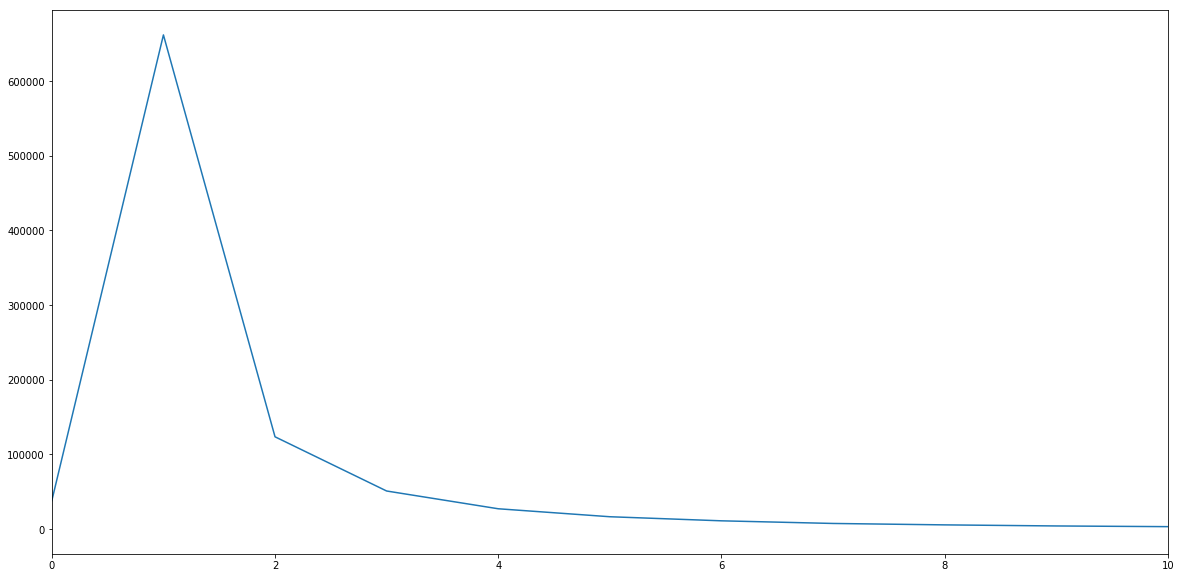

In [31]:
#plt.bar(counter_indegree.keys(), counter_indegree.values(), 0.05)
lists = sorted(counter_indegree.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.xlim([0, 10])
plt.plot(x, y)
plt.savefig('dist_in_degree.png', bbox_inches='tight')
plt.show()


### Out Degree

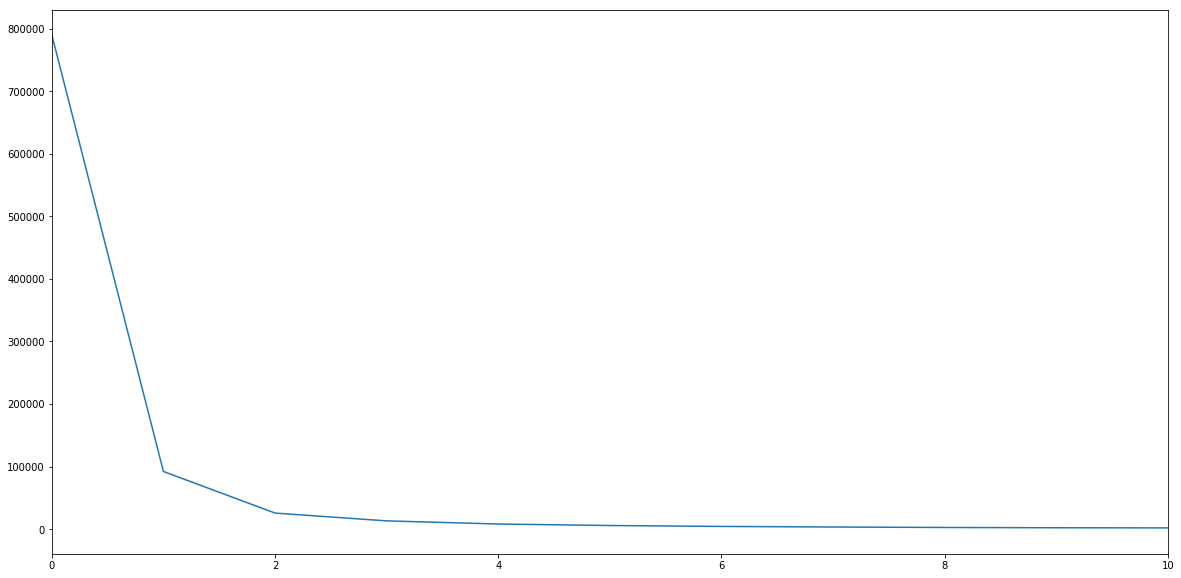

In [32]:
#plt.bar(counter_outdegree.keys(), counter_outdegree.values(), 0.5)
lists = sorted(counter_outdegree.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.xlim([0, 10])
plt.plot(x, y)
plt.savefig('dist_out_degree.png', bbox_inches='tight')
plt.show()

### Undirected Degree

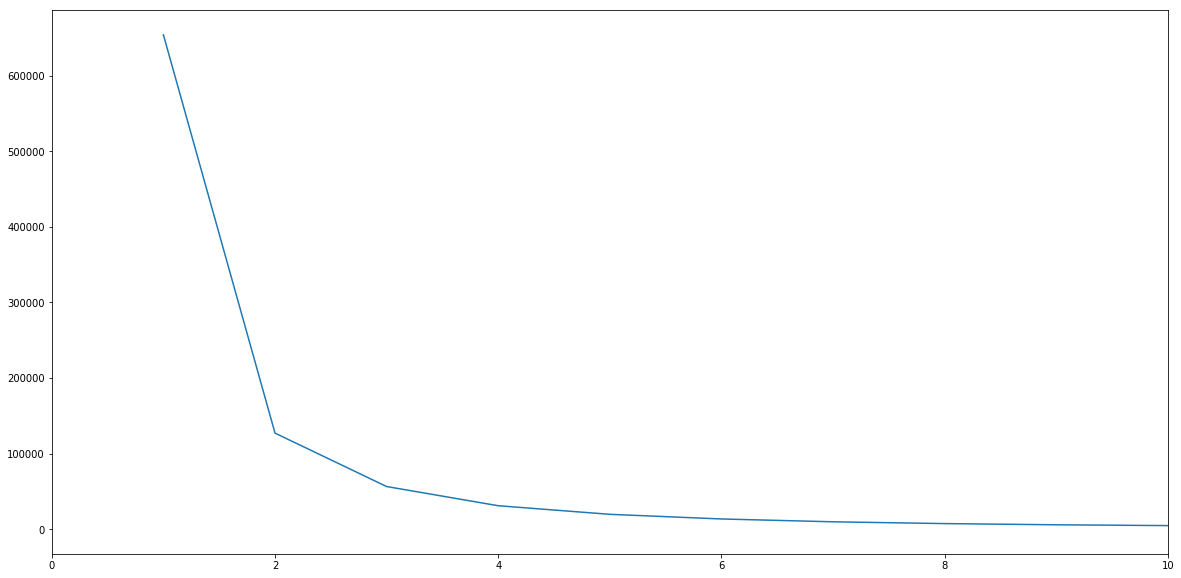

In [33]:
## HITS, SAVE IMAGES
G2 = graph.to_undirected()
ddegree = dict(G2.degree())
counter_ddegree = defaultdict(int)
for k, v in ddegree.items():
    counter_ddegree[v]+=1

lists = sorted(counter_ddegree.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.xlim([0, 10])
plt.plot(x, y)
plt.savefig('dist_und_degree.png', bbox_inches='tight')
plt.show()

del G2

In [34]:
counter_ddegree == counter_outdegree

False

### Betweeness Centrality

#plt.bar(counter_b.keys(), counter_b.values(), 0.05)
lists = sorted(counter_b.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.savefig('dist_centrality_betweeness.png', bbox_inches='tight')
plt.show()

### Degree Centrality

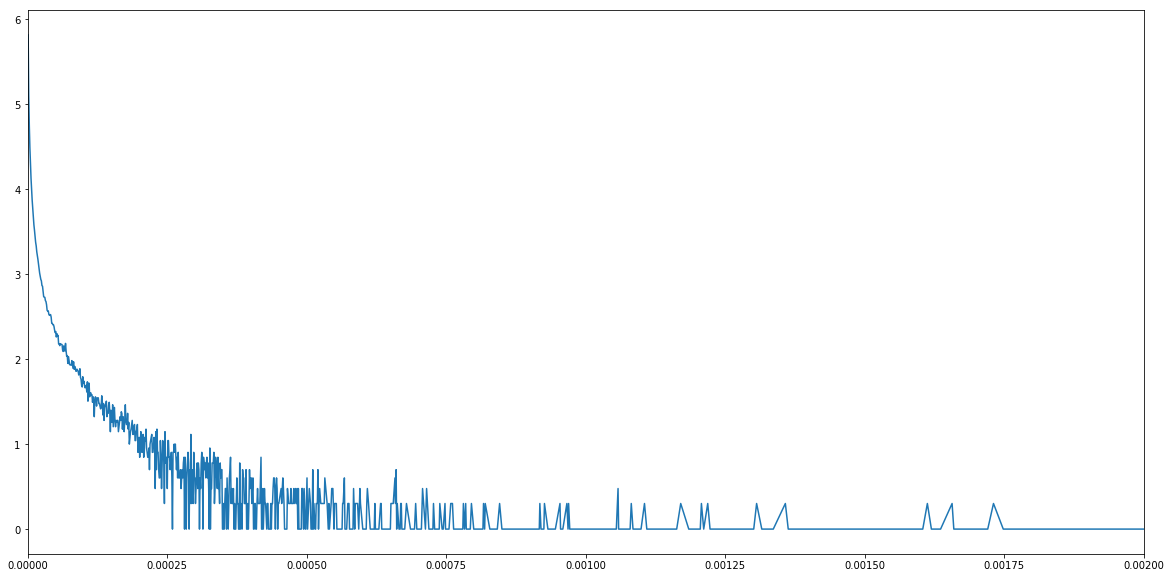

In [35]:
#plt.bar(counter_d.keys(), counter_d.values(), 0.05)
lists = sorted(counter_d.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.xlim([0, 0.002])
plt.plot(x, np.log10(y))
plt.savefig('dist_centrality_degree.png', bbox_inches='tight')
plt.show()

### Closeness Centrality

#plt.bar(counter_c.keys(), counter_c.values(), 0.05)
lists = sorted(counter_c.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.savefig('dist_centrality_closeness.png', bbox_inches='tight')
plt.plot(x, y)
plt.show()

### Eigen-vector (Page Rank) Centrality

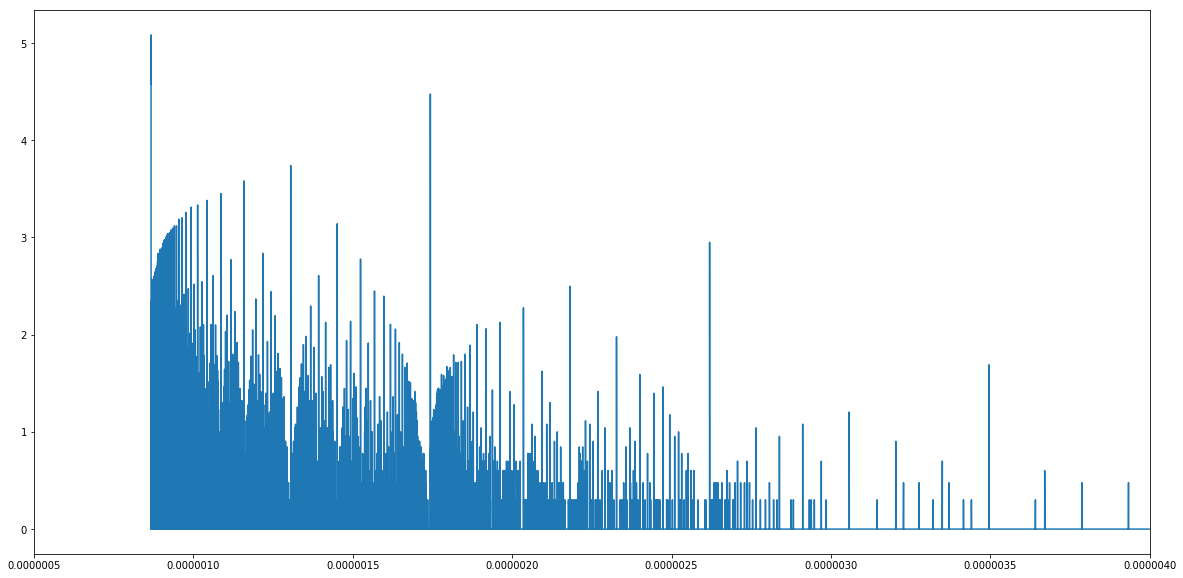

In [36]:
lists = sorted(counter_pg.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.xlim([0.0000005, 0.000004])
plt.plot(x, np.log10(y))
plt.savefig('dist_centrality_pagerank.png', bbox_inches='tight')
plt.show()

### Hubs and Authorities values

/Users/sachando/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


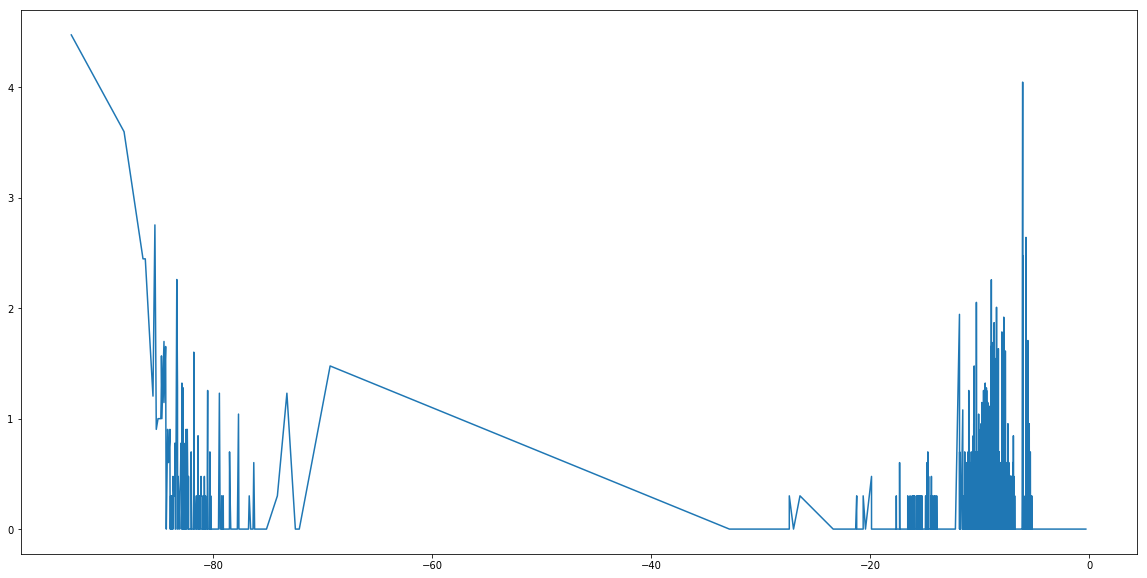

In [37]:
lists = sorted(counter_hubs.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
#plt.xlim([0, 1])
plt.plot(np.log10(x), np.log10(y))
plt.savefig('dist_centrality_hubs.png', bbox_inches='tight')
plt.show()

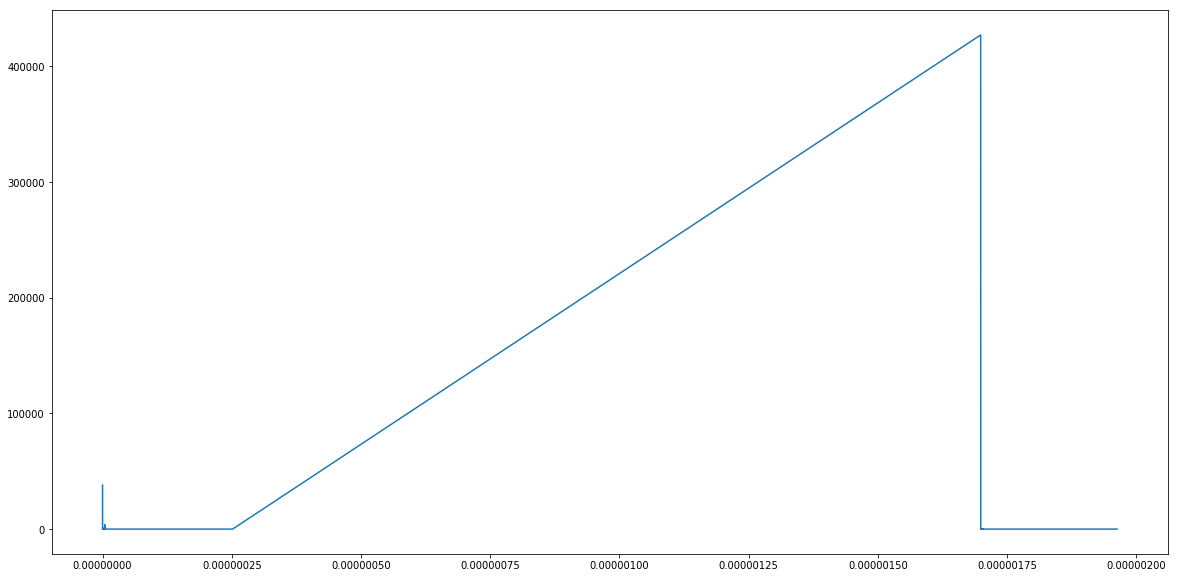

In [38]:
lists = sorted(counter_auths.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.savefig('dist_centrality_auths.png', bbox_inches='tight')
plt.show()

In [39]:
counter_auths

defaultdict(int,
            {1.7006392575098756e-06: 1,
             1.7043484001413592e-06: 1,
             1.758043382585282e-06: 1,
             2.0259115302336317e-08: 1,
             3.316637799478166e-10: 1,
             2.0942982600086508e-07: 1,
             1.4385364061652826e-08: 1,
             1.3046073833392852e-07: 1,
             9.787201251229377e-08: 1,
             2.7414003191733902e-08: 1,
             2.3646161521821138e-07: 1,
             5.274257047084022e-11: 1,
             1.5537602334169615e-09: 1,
             4.1986154764348344e-09: 1419,
             1.7860638268286665e-06: 1,
             1.6997609348218206e-06: 1,
             1.7207566359896452e-06: 1,
             5.652167648433948e-10: 1,
             9.880146200019299e-11: 1,
             9.781660805372848e-09: 1,
             1.0564450929390988e-10: 3,
             6.746819390364079e-10: 1,
             4.0572378063455866e-11: 6,
             8.660487380202383e-09: 1,
             4.71527585114943